In [20]:
import numpy as np
from keras import layers, optimizers, models

Using TensorFlow backend.


In [168]:
size = 1024

x_train = np.random.randint(2, size=(size, 4))
y_train = x_train[:, :1]

val_size = int(size*0.2)
x_val = x_train[:val_size]
partial_x_train = x_train[val_size:]

y_val = y_train[:val_size]
partial_y_train = y_train[val_size:]

print(partial_x_train[:5])
print(partial_y_train[:5])

[[1 0 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 0 0 1]
 [0 0 1 1]]
[[1]
 [1]
 [1]
 [1]
 [0]]


In [173]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(4,)))
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['acc'])

model.predict(partial_x_train[:1])

array([[0.41261423]], dtype=float32)

In [174]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=32,
    verbose=False,
    validation_data=(x_val, y_val))

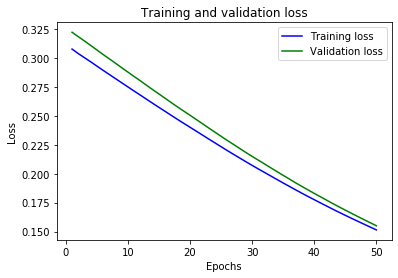

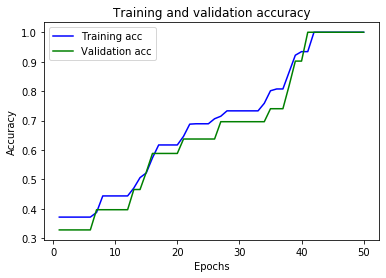

In [175]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [172]:
x_test = np.random.randint(2, size=(10, 4))
for x in x_test:
    print(x, model.predict(np.array([x]))[0, 0])

[1 0 0 1] 0.85572815
[1 0 0 1] 0.85572815
[1 1 0 1] 0.8443422
[0 0 1 1] 0.13940819
[0 0 0 1] 0.16793987
[1 0 0 1] 0.85572815
[1 1 0 0] 0.8719443
[0 1 0 0] 0.18811704
[1 1 0 0] 0.8719443
[0 1 0 0] 0.18811704
